In [1]:
## Load the SPARSim R package
library(SPARSim)

# Load Zheng preset
data(Zheng_param_preset) #Zheng_param_preset

# Get the description of Zheng preset
?Zheng_param_preset

Zheng_param_preset {SPARSim},R Documentation


## Inspect the parameter preset

In [2]:
class(Zheng_param_preset)

[1] "list"

In [3]:
length(Zheng_param_preset)

[1] 4

In [4]:
names(Zheng_param_preset)

[1] "Zheng_C1" "Zheng_C2" "Zheng_C3" "Zheng_C4"

In [5]:
str(Zheng_param_preset$Zheng_C1)

List of 4
 $ intensity  : Named num [1:19536] 0.000663 0.001129 0.01265 0.000435 0.03512 ...
  ..- attr(*, "names")= chr [1:19536] "AP006222.2" "RP11-206L10.2" "RP11-206L10.9" "FAM87B" ...
 $ variability: num [1:19536(1d)] 2.4927 2.4923 0.0373 2.4934 0.0335 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ : chr [1:19536] "AP006222.2" "RP11-206L10.2" "RP11-206L10.9" "FAM87B" ...
 $ lib_size   : Named num [1:1440] 32189 14275 15172 12141 17937 ...
  ..- attr(*, "names")= chr [1:1440] "AAACATACAGCTAC-1" "AAACGCTGCGCATA-1" "AAACTTGAAAGAAC-1" "AAAGACGATATCGG-1" ...
 $ name       : chr "Zheng_C1"


## Simulation

In [2]:
# select only the first two experimental conditions (Jurkat cells and T cells)
new_Zheng_param_preset <- Zheng_param_preset[1:2]

In [4]:
# simulate with SPARSim
set.seed(7)
sim_result_Zheng <- SPARSim_simulation(dataset_parameter = new_Zheng_param_preset)

Number of experimental conditions:  2 
Number of genes:  19536 
Number of cells:  3158 
Setting gene expression intensity...  
Setting gene expression variability ...  
Simulating biological variability ...  
Simulating technical variability ...  


## Inspect the simulated data

### Extract the data and do pre-processing

In [ ]:
# gene expression level
gene_expr <- round(sim_result_Zheng$gene_matrix*10^4)

In [ ]:
# raw count
count <- sim_result_Zheng$count_matrix

In [ ]:
# pre-process raw count: scran normalization
norm_count <- scran_normalization(count)

In [3]:
# Alternative to save time: load data
#load("Example4_gene_expr.RData")
#load("Example4_count.RData")
#load("Example4_norm_count.RData")

### Dimension reduction and visualization

In [ ]:
# NOTE: Usually, gene filtering is performed prior to dimensionally reduction
# In this example, we will skip the gene filtering step for simplicity
# Hovewer, this will make the results of dimensionally reduction more noisy

# UMAP (with default options)
library(umap)
umap_gene_expr <- umap::umap(t(gene_expr))
umap_count <- umap::umap(t(count))
umap_norm_count <- umap::umap(t(norm_count))

In [5]:
# Alternative to save time: load data
#load("Example4_umap_gene_expr.RData")
#load("Example4_umap_count.RData")
#load("Example4_umap_norm_count.RData")

In [6]:
# function to plot umap results
plot_umap <- function(x, labels, main="A UMAP visualization", colors=c("violet", "blue", "gray", "cyan", "darkblue", "green"),
                      pad=0.2, cex=1, pch=19, add=FALSE, legend.suffix="", cex.main=1.5, cex.legend=1.5, legend.pos = "topright") {
  #setup
  layout = x$layout
  names(colors) <- unique(labels)
  xylim = range(layout); xylim = xylim + ((xylim[2]-xylim[1])*pad)*c(-0.5, 0.5)
  par(mar=c(0.2,0.7,1.2,0.7), ps=10)
  # plot data
  plot(xylim, xylim, type="n", axes=F, frame=F)
  rect(xylim[1], xylim[1], xylim[2], xylim[2], border="#aaaaaa", lwd=0.25)
  points(layout[,1], layout[,2], col=colors[labels], cex=cex, pch=pch)
  mtext(side=3, main, cex=cex.main)
  # add legends
  labels.u = unique(labels)
  legend.text = as.character(labels.u)
  legend(x = xylim[1], y = xylim[2], legend=legend.text, col=colors[labels.u], bty="n", pch=pch, cex=cex.legend)
}

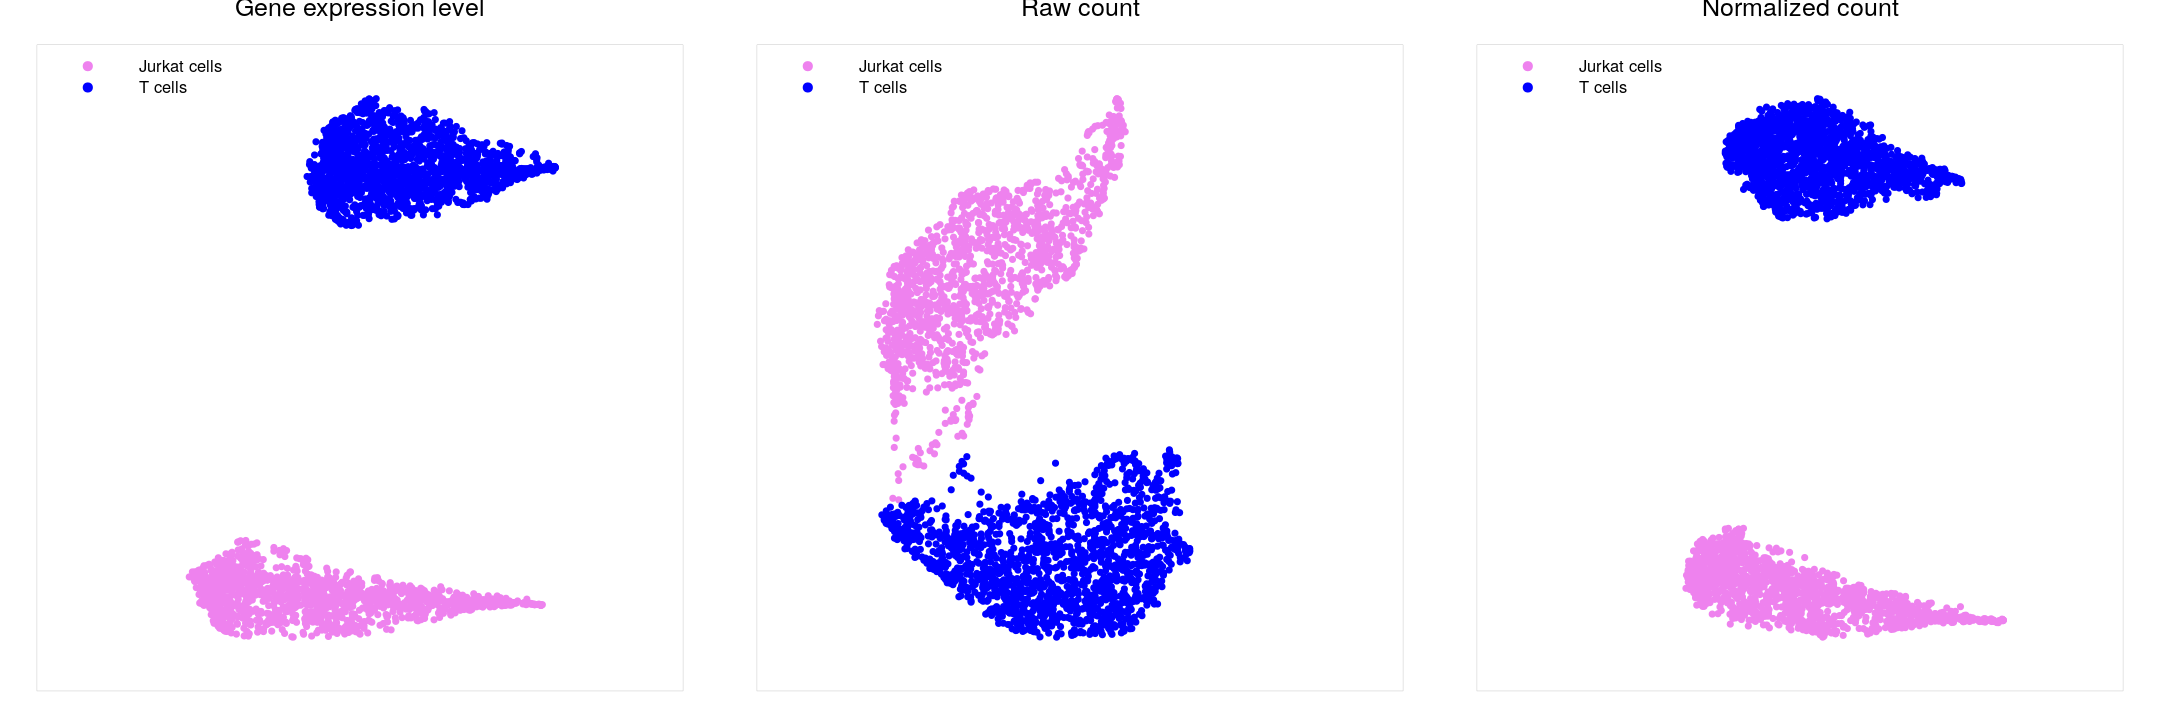

In [7]:
# UMAP visualization
par(mfrow=c(1,3))
options(repr.plot.width=18, repr.plot.height=6) # plot size
cell_label <- c( rep("Jurkat cells", 1440) , rep("T cells", 1718))
plot_umap(umap_gene_expr, cell_label, main = "Gene expression level")
plot_umap(umap_count, cell_label, main = "Raw count")
plot_umap(umap_norm_count, cell_label, main = "Normalized count")

### Check some example genes

In [11]:
# function to plot histogram of gene expression level / raw count / normalized count
plot_histogram <- function(input_gene, gene, xlabel, color){
  # compute gene sparsity
  gene_sparsity <- round( 100*sum(input_gene==0) / length(input_gene) , 2)
  # plot histogram of raw counts
  hist(input_gene, xlim = c(0,max(input_gene*2)), breaks = 20, main = paste0(gene,"\n sparsity: ", gene_sparsity," %"), 
       col =  color, xlab = xlabel, cex.lab=1.5, cex.axis=1.5, cex.main = 2, cex = 4)
}

Example genes: Jurkat cells vs T cells 
ISG15 



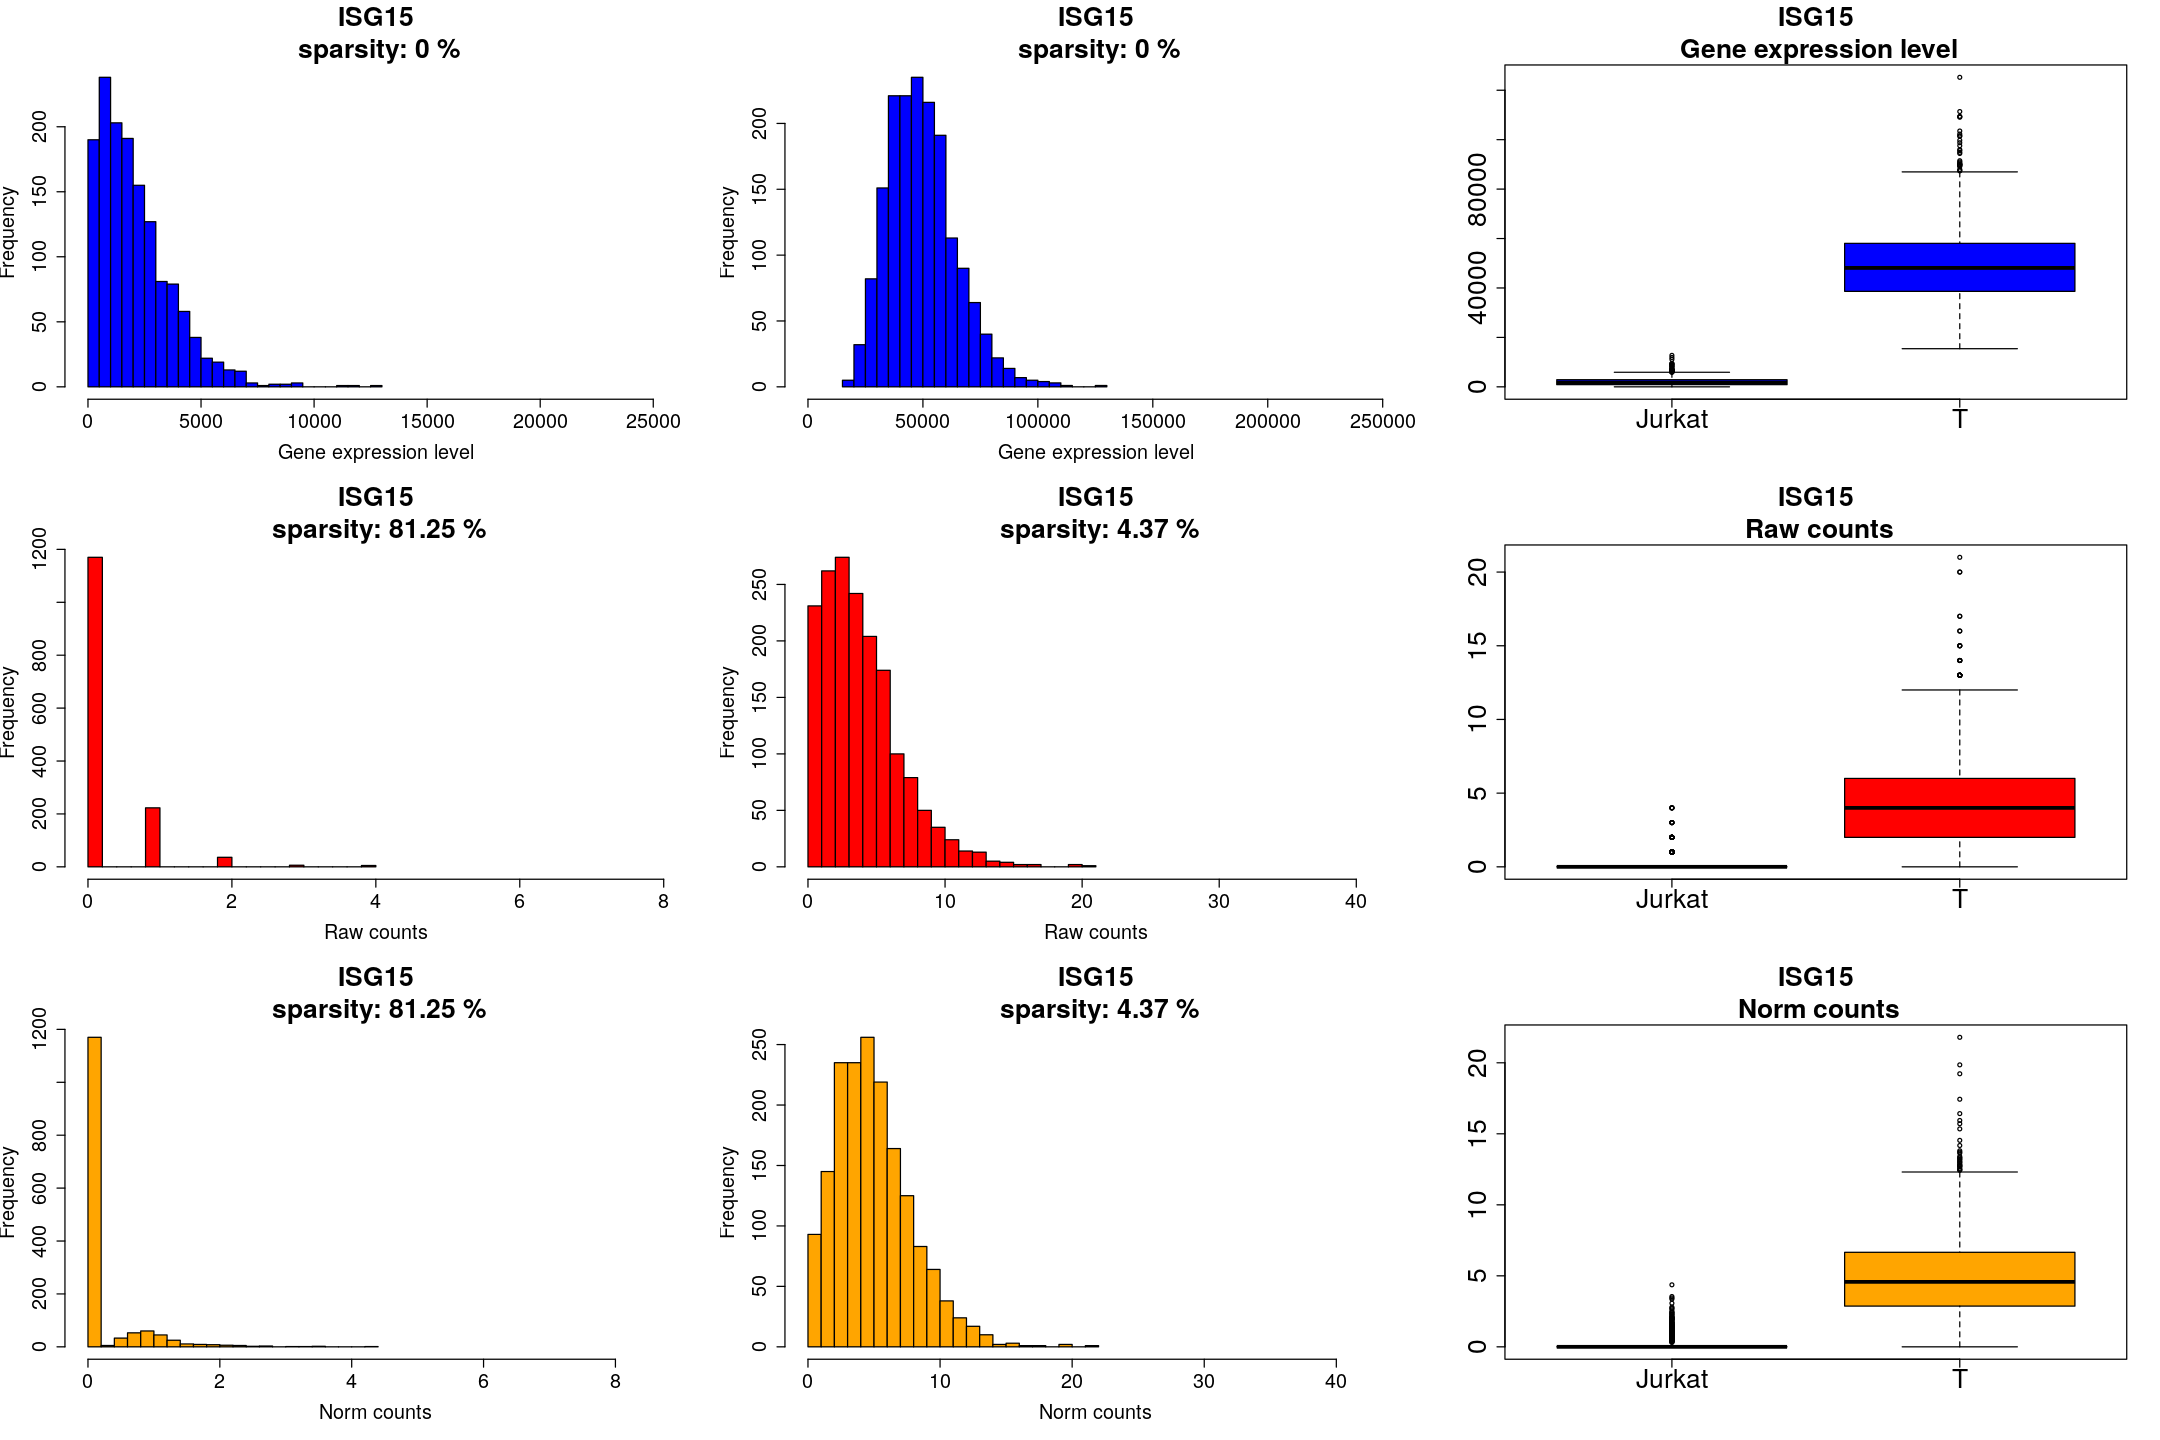

SAMD11 



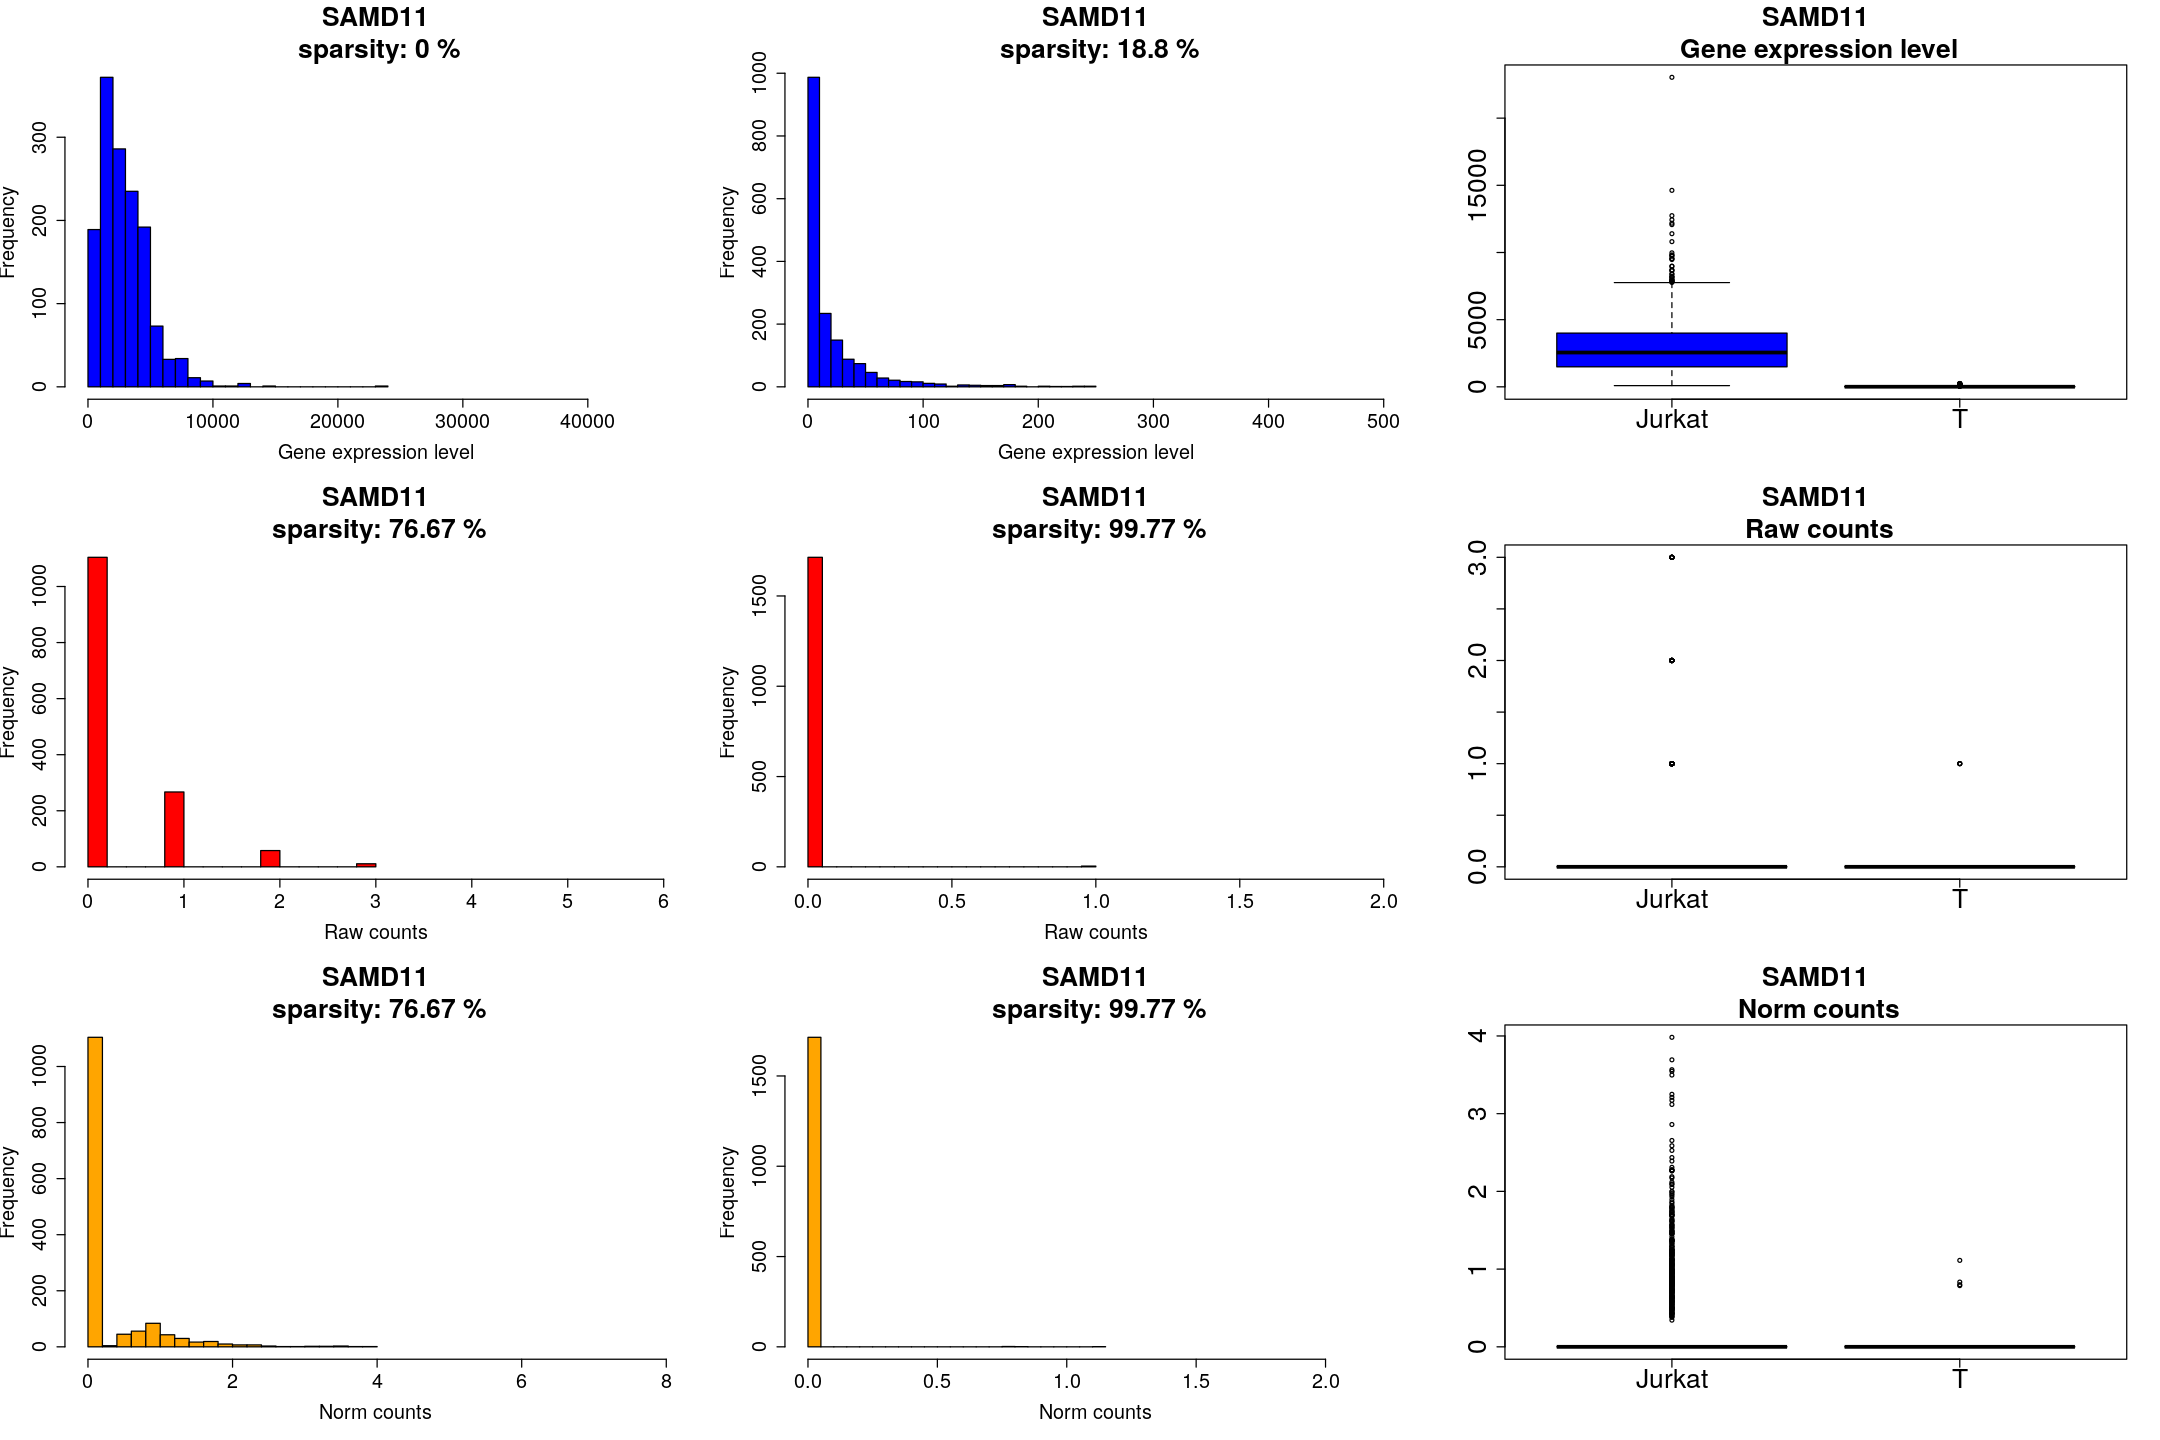

NOC2L 



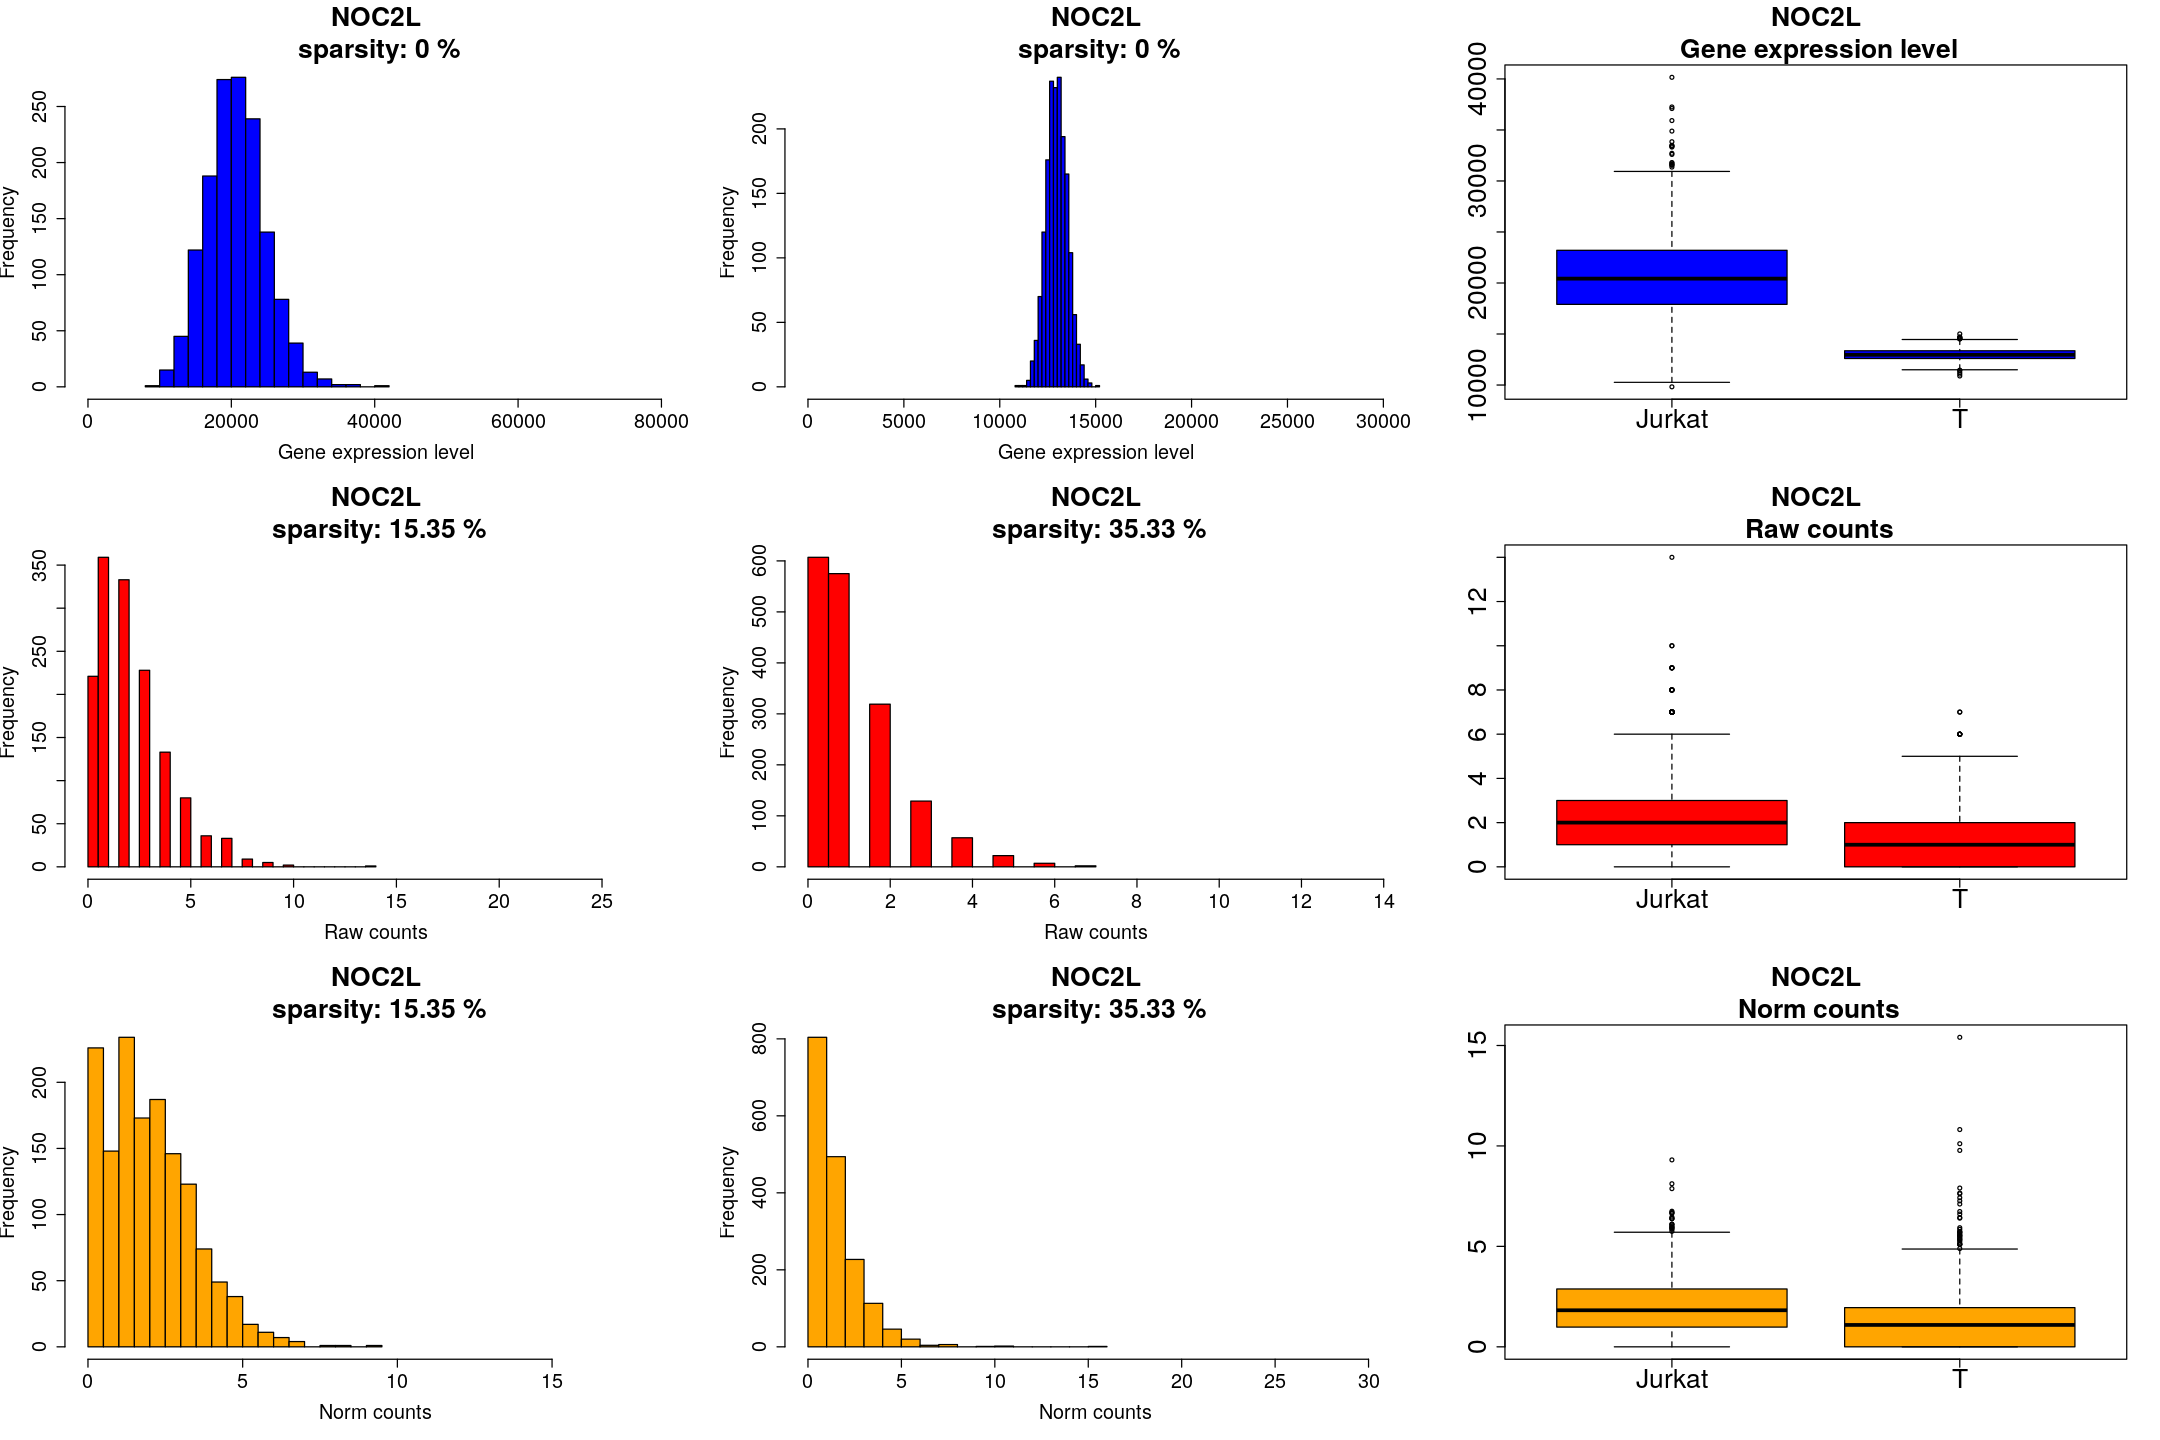

HES4 



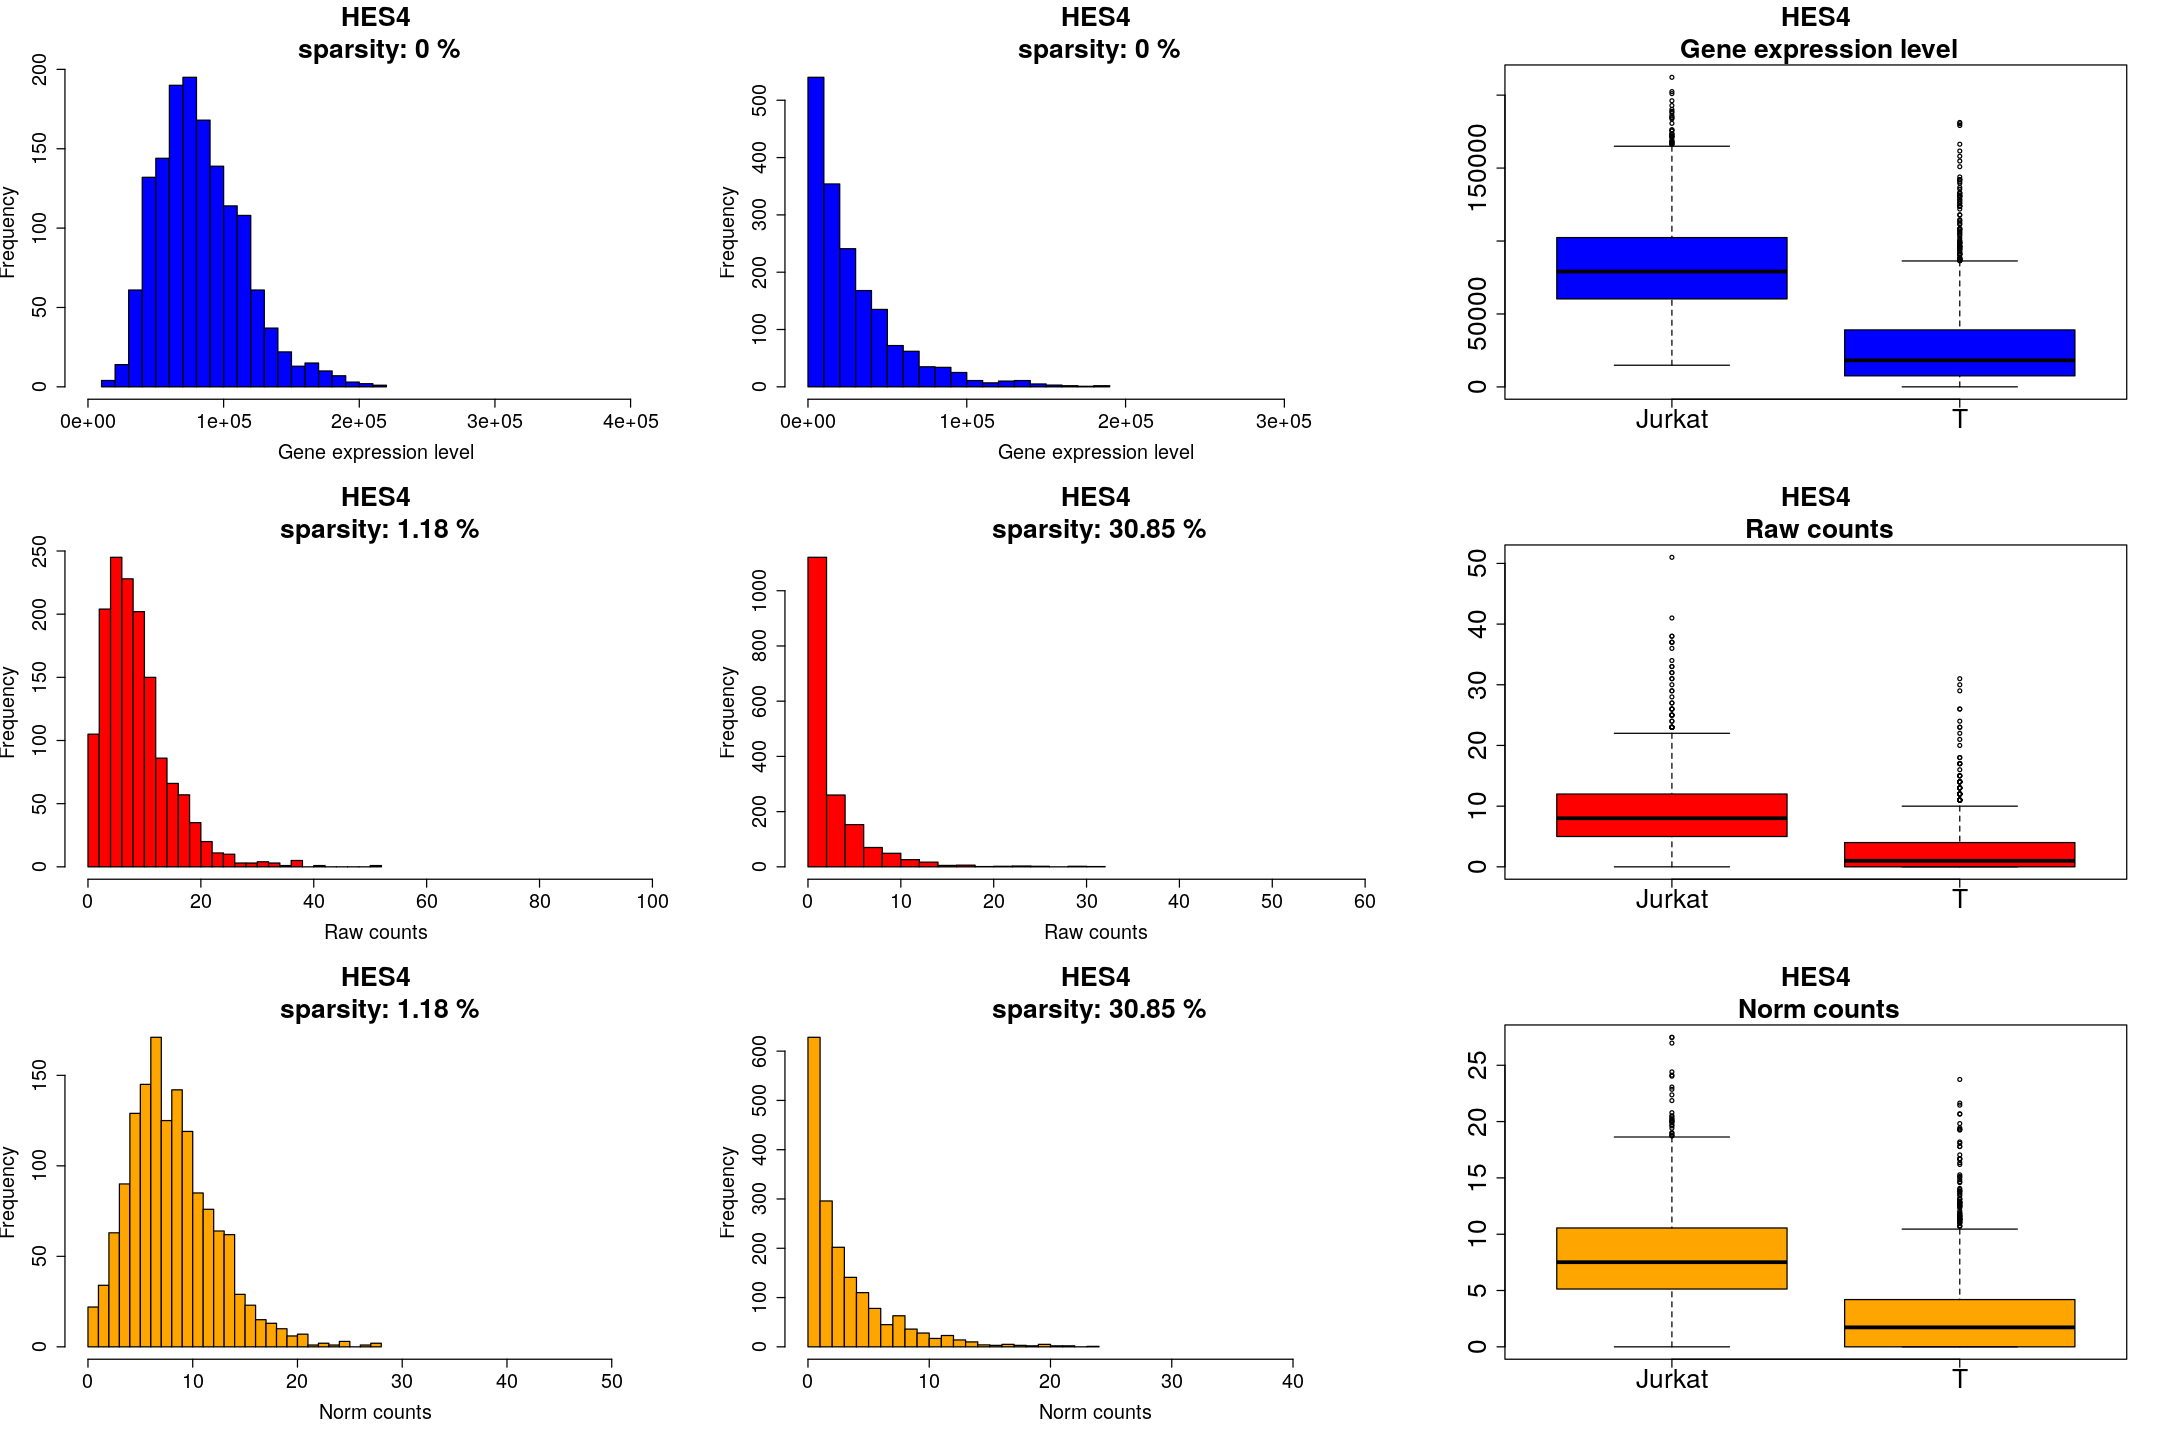

ADPRHL2 



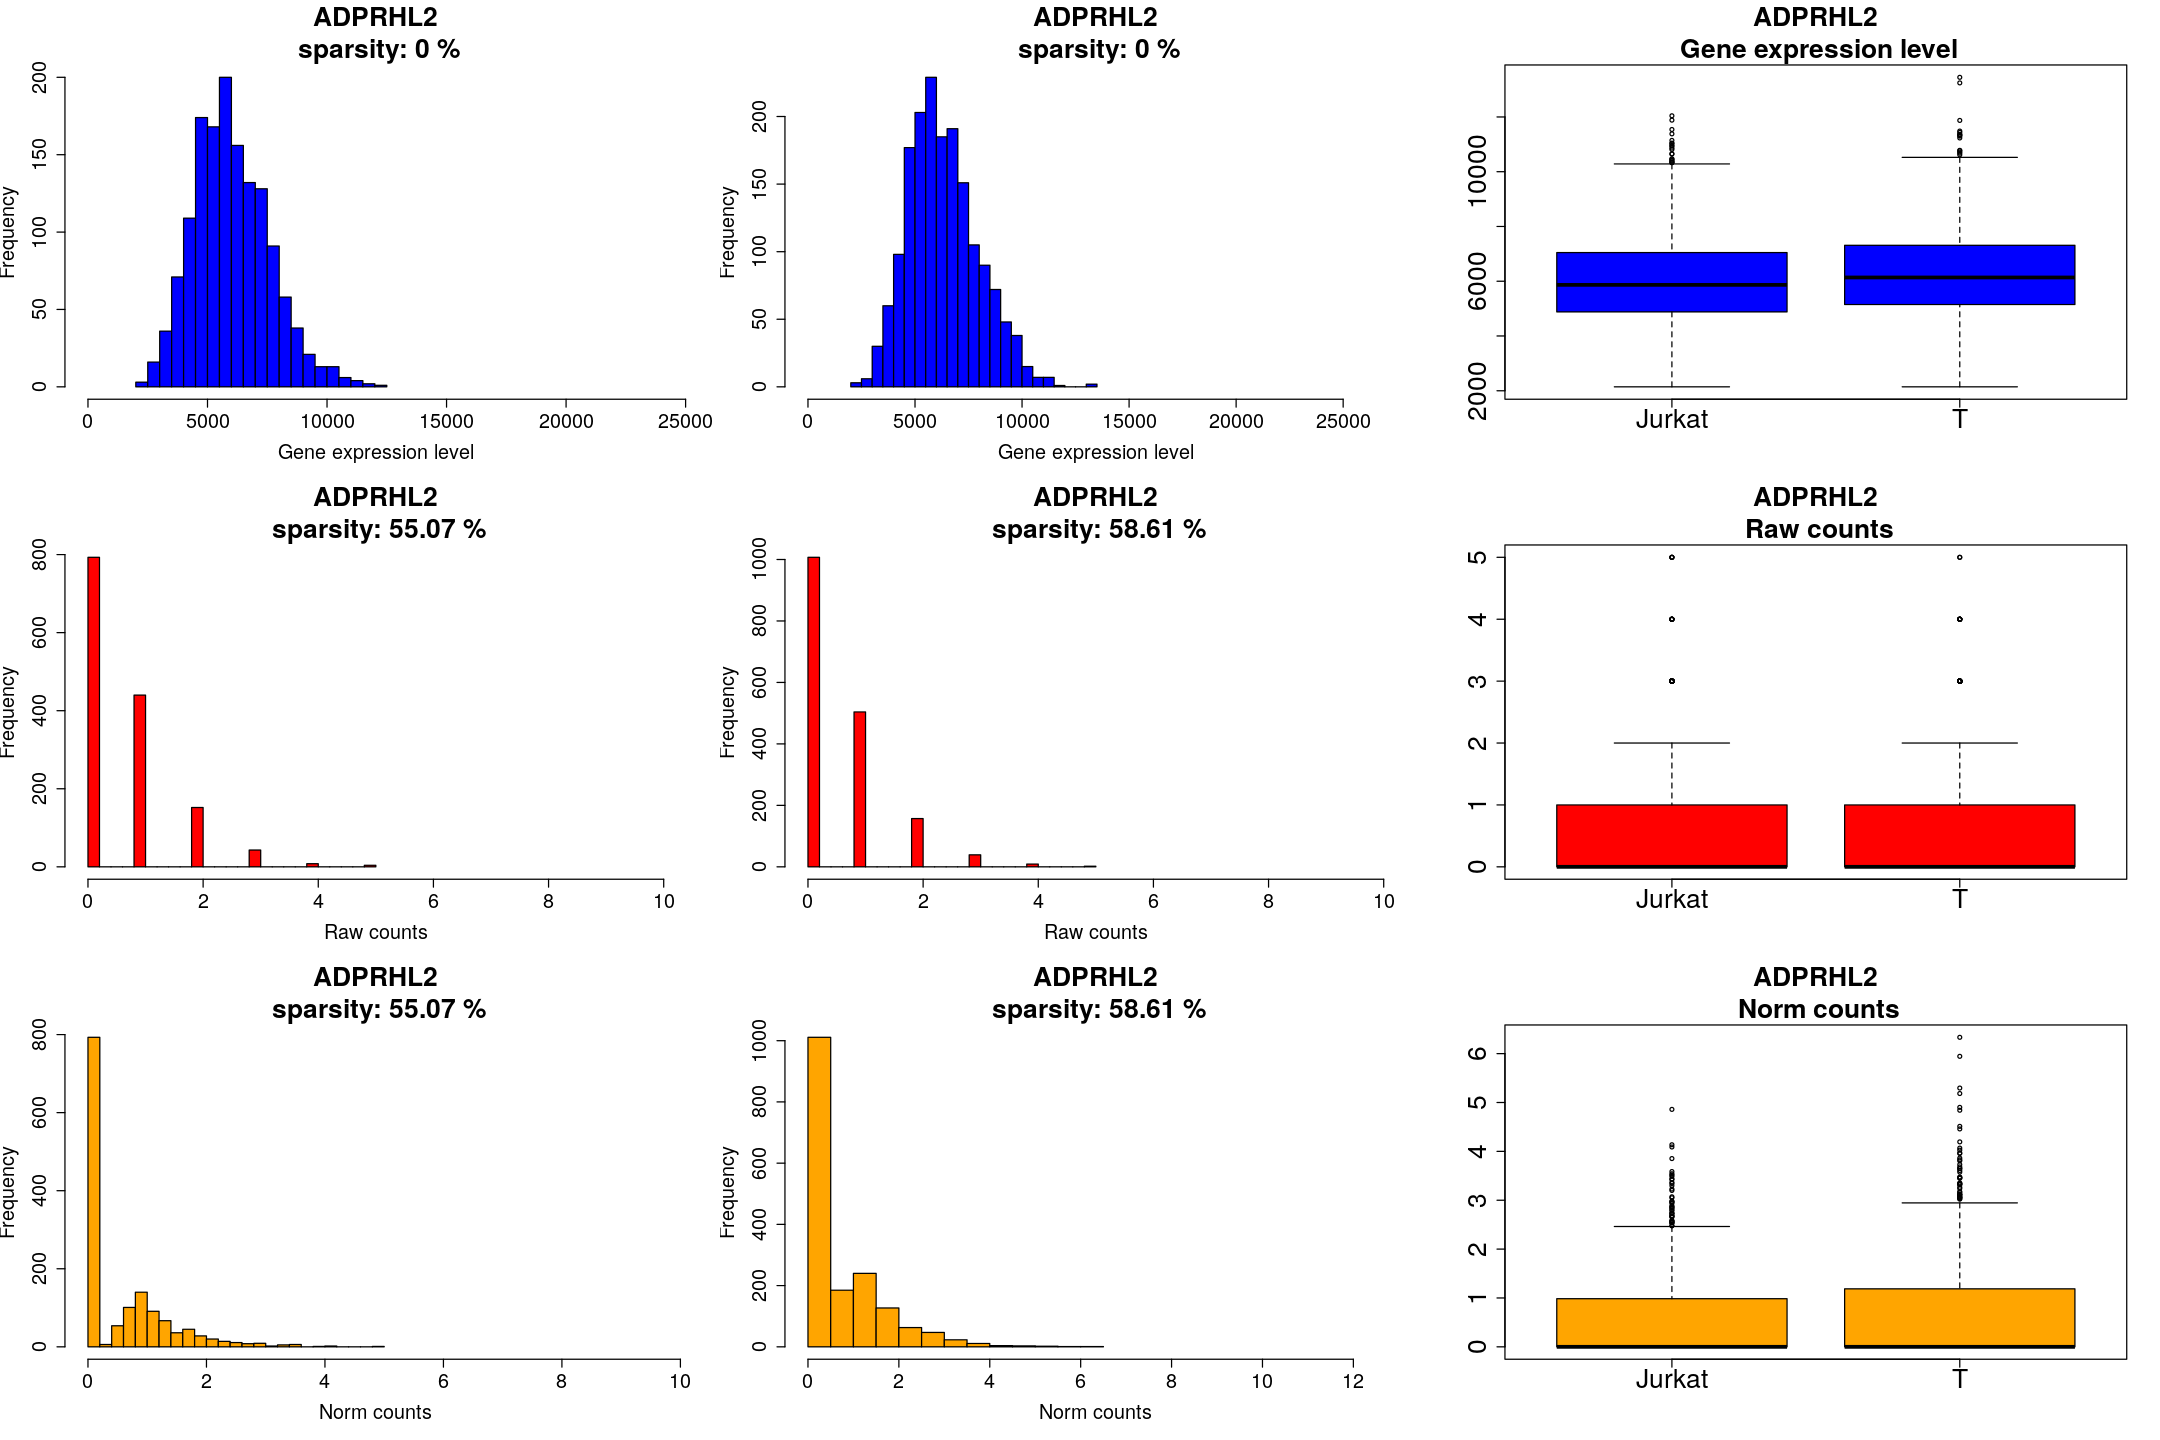

YPEL3 



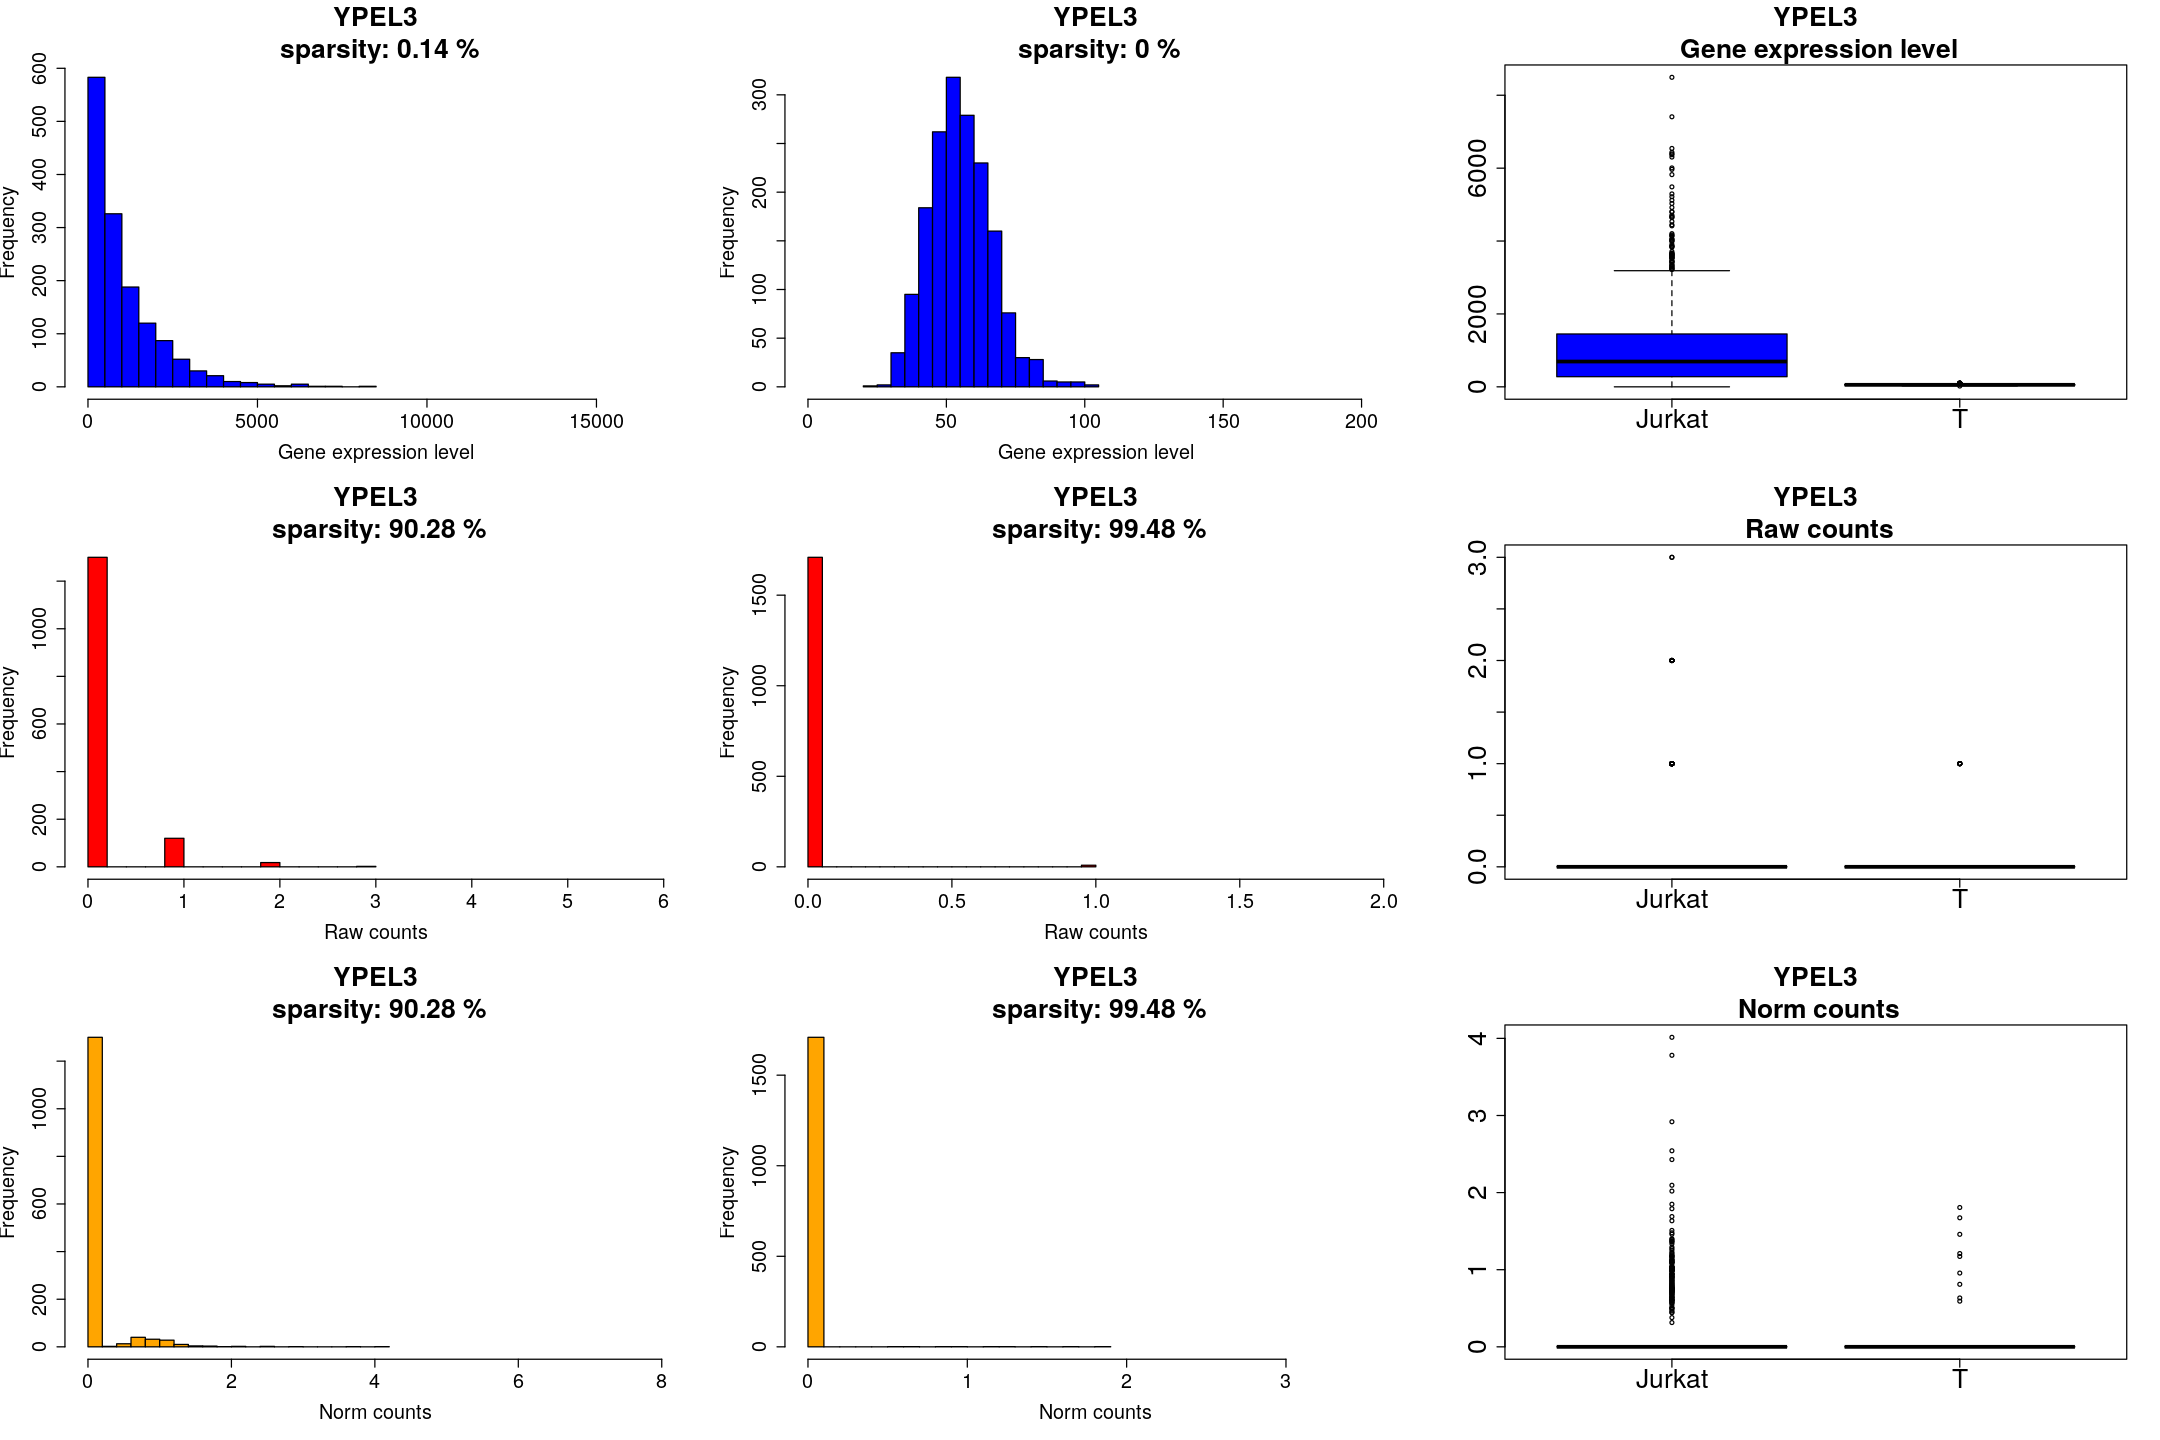

In [14]:
# select some random genes
example_genes <- c("ISG15", "SAMD11", "NOC2L", "HES4" ,"ADPRHL2", "YPEL3") 

Jurkat_cells_columns <- c(1:1440)
T_cells_columns <- c(1441:3158)

# plot genes characteristics
cat("Example genes: Jurkat cells vs T cells \n")

for(gene in example_genes){ # for each example gene
  
  options(repr.plot.width=18, repr.plot.height=12) # plot size
  par(mfrow=c(3,3))
  
  # plot gene expression level  
  plot_histogram(input_gene = gene_expr[gene,Jurkat_cells_columns], gene = gene, xlabel = "Gene expression level", color = "blue") # hist Jurkat
  plot_histogram(input_gene = gene_expr[gene,T_cells_columns], gene = gene, xlabel = "Gene expression level", color = "blue") # hist T
  boxplot(gene_expr[gene, Jurkat_cells_columns], gene_expr[gene,T_cells_columns], main = paste0(gene, "\n Gene expression level"), col = "blue", 
          names = c("Jurkat", "T"), cex.axis=2, cex.main = 2) # boxplot Jurkat vs T
  
  # plot raw count
  plot_histogram(input_gene = count[gene,Jurkat_cells_columns], gene = gene, xlabel = "Raw counts", color = "red") # hist Jurkat
  plot_histogram(input_gene = count[gene,T_cells_columns], gene = gene, xlabel = "Raw counts", color = "red") # hist T
  boxplot(count[gene, Jurkat_cells_columns], count[gene,T_cells_columns], main = paste0(gene, "\n Raw counts"), col = "red", 
          names = c("Jurkat", "T"), cex.axis=2, cex.main = 2) # boxplot Jurkat vs T
  
  # plot pre-processed (normalized) counts
  plot_histogram(input_gene = norm_count[gene,Jurkat_cells_columns], gene = gene, xlabel = "Norm counts", color = "orange") # hist Jurkat
  plot_histogram(input_gene = norm_count[gene,T_cells_columns], gene = gene, xlabel = "Norm counts", color = "orange") # hist T
  boxplot(norm_count[gene, Jurkat_cells_columns], norm_count[gene,T_cells_columns], main = paste0(gene, "\n Norm counts"), col = "orange", 
          names = c("Jurkat", "T"), cex.axis=2, cex.main = 2) # boxplot Jurkat vs T
    
  cat(gene, "\n")
  cat("\n")
}